In [3]:
# Setting the PythonPath
import os

# # Get the parent directory of the current working directory
parent_dir = os.path.dirname(os.getcwd())
if "changed" not in locals():
    changed = False

if not changed:
    os.chdir(parent_dir)
    changed = True
print(os.getcwd())

%load_ext autoreload
%autoreload 2

/home/local/USHERBROOKE/aara2601/projects/effective-efficient-qrc
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
from src.configs import RingQRConfig

input_dim = 10

cfg = RingQRConfig(input_dim=10, num_qubits=3, seed=12345)
cfg.topology

QRTopologyConfig(num_qubits=3, edges=((0, 1), (1, 2), (2, 0)))

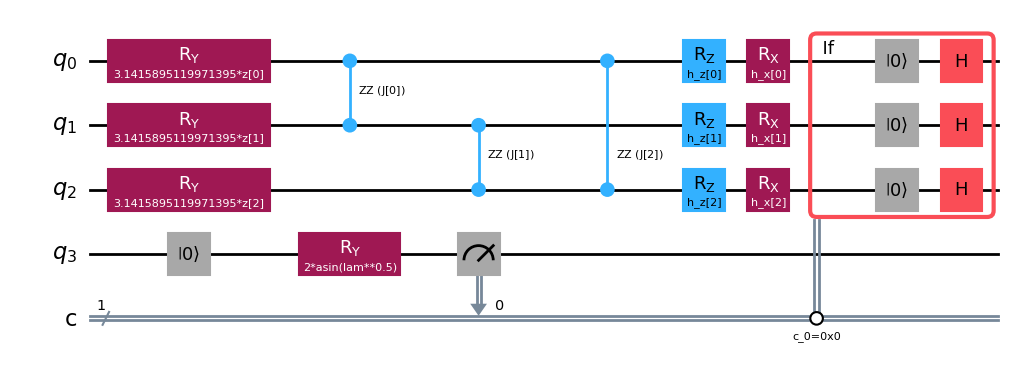

In [8]:
from src.circuit_factory import CircuitFactory
from src.utils import angle_positioning_linear

qc_reservoir = CircuitFactory.createIsingRingCircuit(cfg=cfg, angle_positioning=angle_positioning_linear, method="density_matrix")
qc_reservoir.draw("mpl")

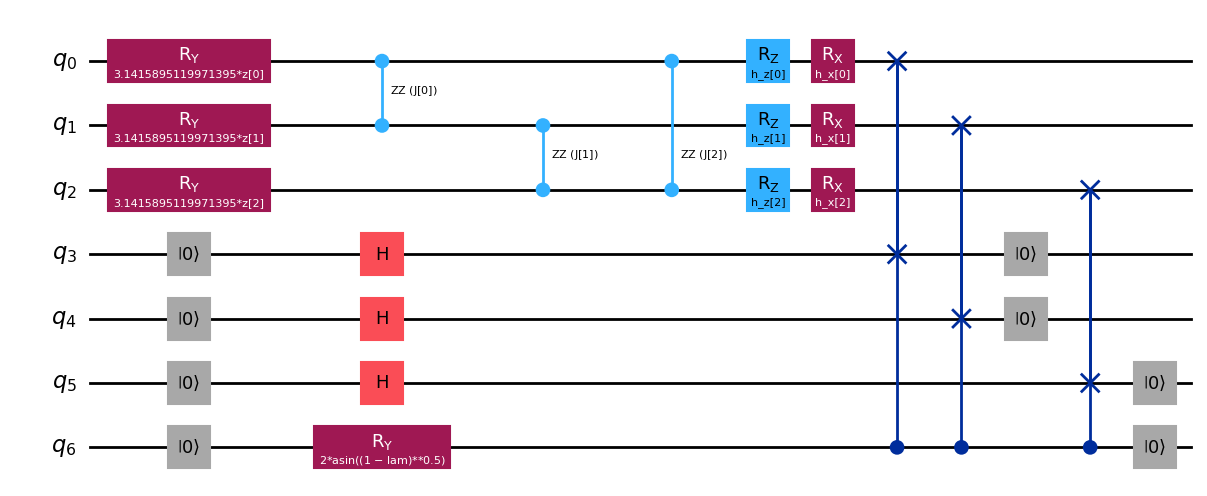

In [13]:
from src.circuit_factory import CircuitFactory
from src.utils import angle_positioning_linear

qc_reservoir = CircuitFactory.createIsingRingCircuitSWAP(cfg=cfg, angle_positioning=angle_positioning_linear)
qc_reservoir.draw("mpl")

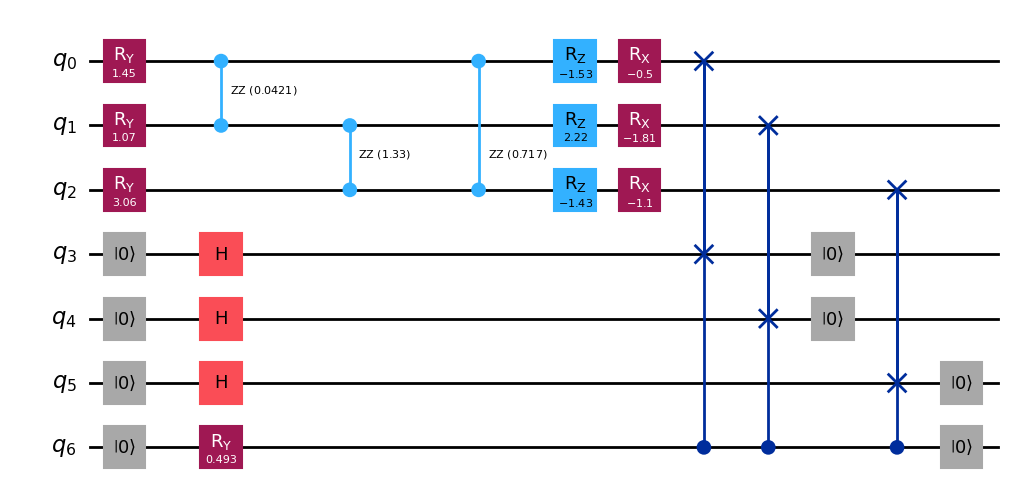

In [14]:
import numpy as np
from math import pi

z_params = qc_reservoir.metadata["z"]
rzz_params = qc_reservoir.metadata["J"]
rx_params = qc_reservoir.metadata["h_x"]
rz_params = qc_reservoir.metadata["h_z"]
lam_param = qc_reservoir.metadata["lam"]

eps = 1e-8

z_t = np.random.uniform(-1 + eps, 1 - eps, size=len(rzz_params))
rzz_values = np.random.uniform(-np.pi, np.pi, size=len(rzz_params))
rx_values  = np.random.uniform(-np.pi, np.pi, size=len(rx_params))
rz_values  = np.random.uniform(-np.pi, np.pi, size=len(rz_params))
lam_value = np.random.uniform(eps, 1)

bind_map_input = dict(zip(z_params, z_t))

bind_map_rzz = dict(zip(rzz_params, rzz_values))
bind_map_rx = dict(zip(rx_params, rx_values))
bind_map_rz = dict(zip(rz_params, rz_values))
bind_map_lam = {lam_param: lam_value}

bind_map_params = bind_map_rzz | bind_map_rx | bind_map_rz | bind_map_lam

bind_map = bind_map_input | bind_map_params

qc_bound = qc_reservoir.assign_parameters(bind_map)
qc_bound.draw("mpl")

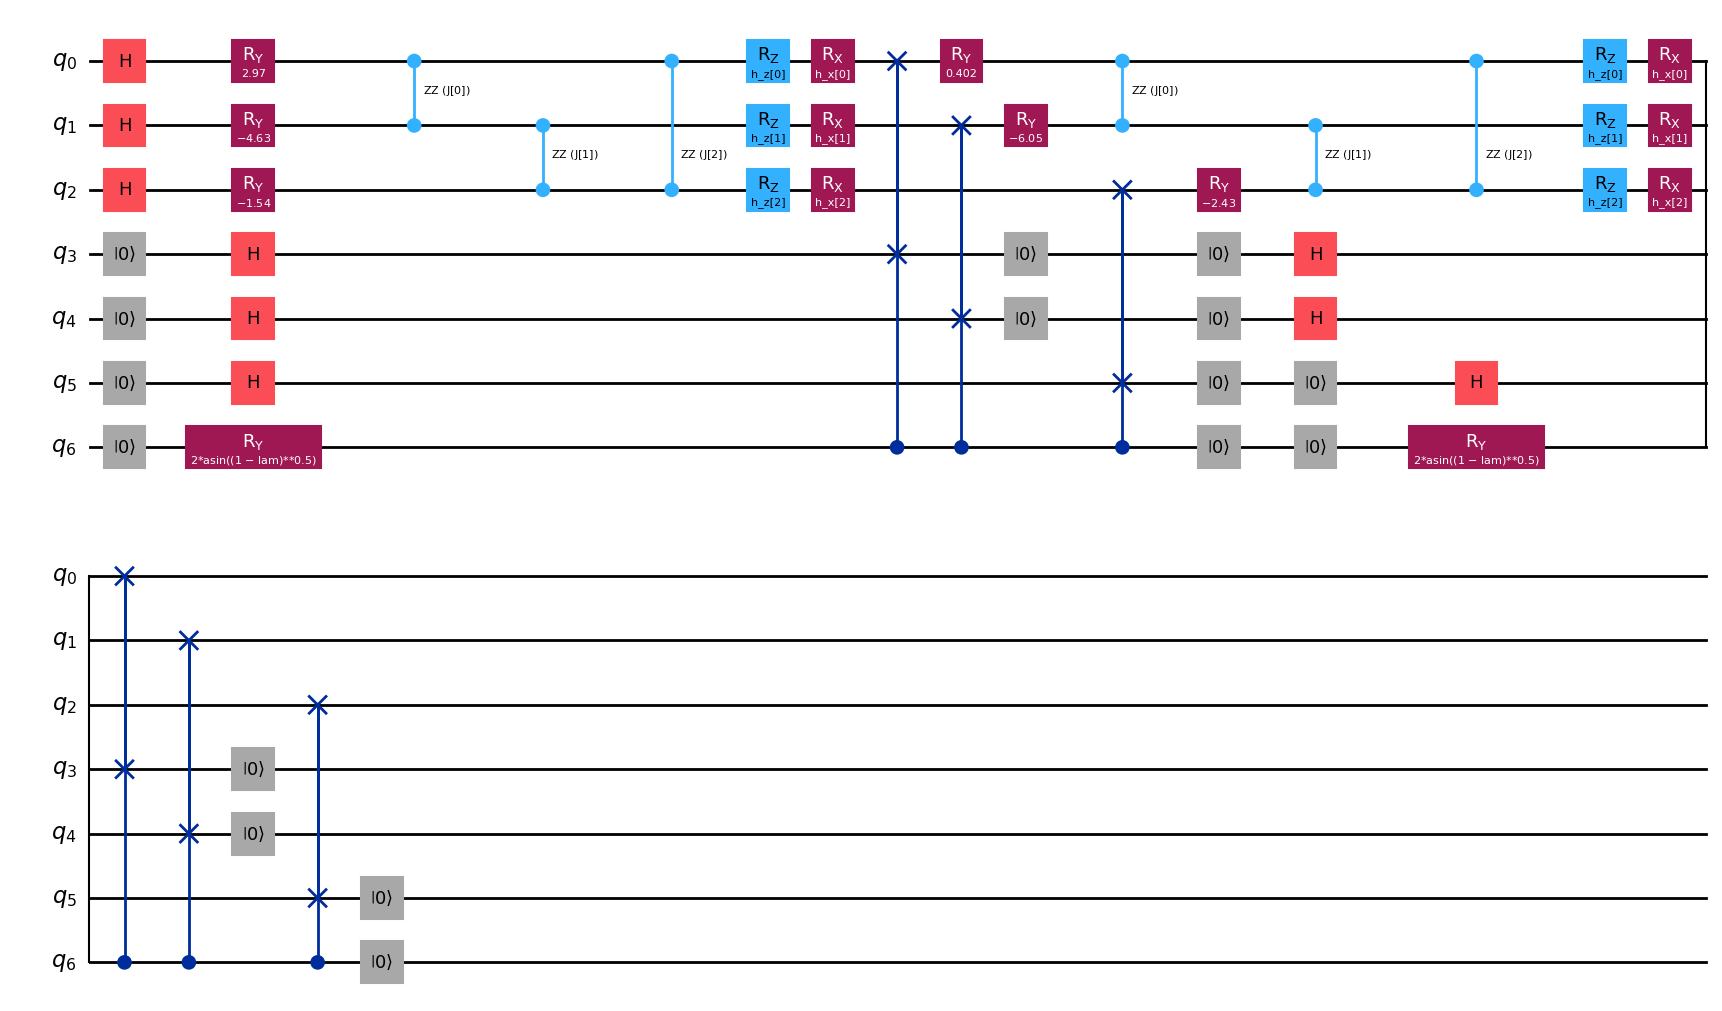

In [16]:
w = 2
x_window = np.random.uniform(-1 + eps, 1 - eps, size=(w, input_dim))
qc = CircuitFactory.instantiateFullIsingRingEvolution(cfg=cfg, angle_positioning=angle_positioning_linear, x_window=x_window)
qc.draw("mpl")

In [11]:
rzz_params = qc.metadata["J"]
rzz_params

ParameterVector(name='J', length=3)

In [17]:
x_window = np.random.uniform(-1 + eps, 1 - eps, size=(w, input_dim))

pub = CircuitFactory.create_pub_reservoir_IsingRingSWAP(
            cfg=cfg,
            angle_positioning=angle_positioning_linear,
            x_window=x_window,
            lam_0=0.05,
            num_reservoirs=2,)

In [22]:
pub[1][0]

array([-0.13449874, -2.67398032, -3.09603229, -0.22509237,  0.72596653,
       -2.65516125,  0.17068877,  1.08326003,  2.0903292 ,  0.05      ])